<a href="https://colab.research.google.com/github/triandosimarmata/myprojects/blob/main/CMAES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,generation,value,x1,x2
1,0,11.671009,0.378690,-1.780917
11,1,52.458897,1.102169,-2.698979
13,2,25.567958,1.135785,-1.529972
22,3,26.457751,-2.119418,-2.049931
24,4,17.463180,-1.164104,-1.964869
31,5,9.009004,0.071305,-1.934292
36,6,4.899587,0.834907,-2.046039
46,7,6.597222,0.499459,-1.941304
53,8,2.987167,1.912169,-1.865695
55,9,5.331274,1.544021,-1.820796


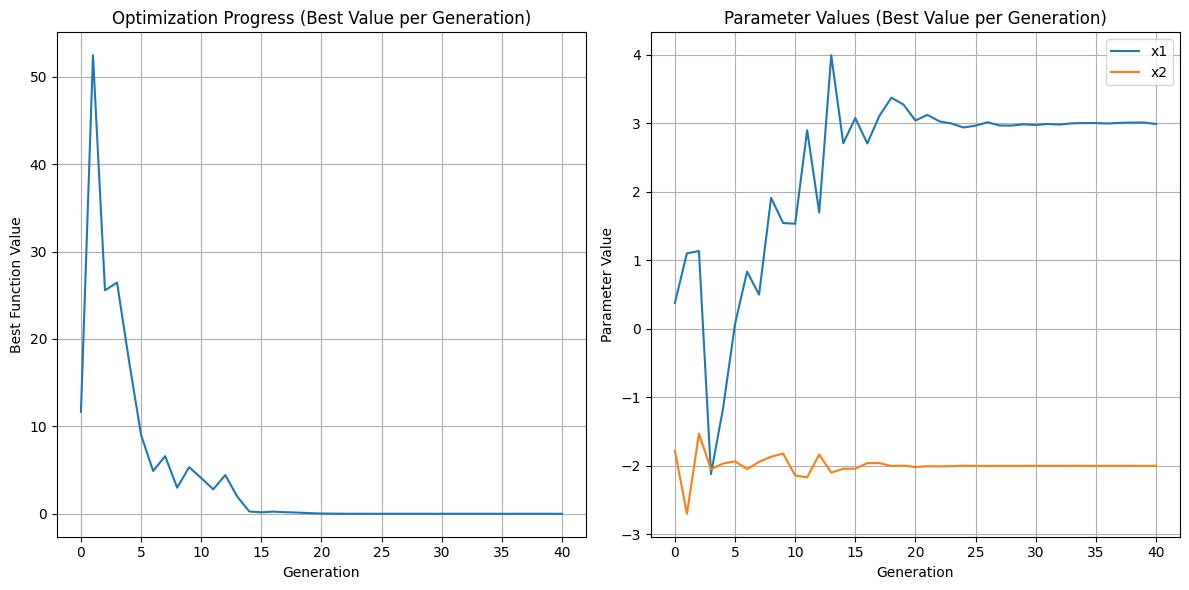

In [ ]:
import numpy as np
import cmaes as cma
import pandas as pd
import matplotlib.pyplot as plt
import re

def quadratic(x1, x2):
    return (x1 - 3) ** 2 + (10 * (x2 + 2)) ** 2

if __name__ == "__main__":
    optimizer = cma.CMA(mean=np.zeros(2), sigma=1.3)

    output_lines = []
    for generation in range(150):
        solutions = []
        for _ in range(optimizer.population_size):
            x = optimizer.ask()
            value = quadratic(x[0], x[1])
            solutions.append((x, value))
            output_lines.append(f"#{generation} {value} (x1={x[0]}, x2 = {x[1]})")
        optimizer.tell(solutions)

    # Parse the output and create a DataFrame
    data = []
    for line in output_lines:
        match = re.match(r"#(\d+) ([\d\.]+) \(x1=([\d\.\-]+), x2 = ([\d\.\-]+)\)", line)
        if match:
            generation, value, x1, x2 = match.groups()
            data.append([int(generation), float(value), float(x1), float(x2)])

    df = pd.DataFrame(data, columns=["generation", "value", "x1", "x2"])

    # Display the DataFrame with the best result per generation
    best_results_per_generation = df.loc[df.groupby('generation')['value'].idxmin()]
    display(best_results_per_generation)

    # Visualize the optimization progress
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(best_results_per_generation['generation'], best_results_per_generation['value'])
    plt.xlabel('Generation')
    plt.ylabel('Best Function Value')
    plt.title('Optimization Progress (Best Value per Generation)')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(best_results_per_generation['generation'], best_results_per_generation['x1'], label='x1')
    plt.plot(best_results_per_generation['generation'], best_results_per_generation['x2'], label='x2')
    plt.xlabel('Generation')
    plt.ylabel('Parameter Value')
    plt.title('Parameter Values (Best Value per Generation)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

In [ ]:
# Find the row with the minimum value across all generations
min_value_row = best_results_per_generation.loc[best_results_per_generation['value'].idxmin()]

# Extract the best value and corresponding x1 and x2
min_value = min_value_row['value']
min_x1 = min_value_row['x1']
min_x2 = min_value_row['x2']

print(f"Overall best result:")
print(f"  Function Value: {min_value}")
print(f"  x1: {min_x1}")
print(f"  x2: {min_x2}")

Overall best result:
  Function Value: 0.00010746468849866993
  x1: 3.006227954405152
  x2: -1.9991712824822292
